In [1]:
## 1.For the given model out, find R Square and Adjusted R square values and comment over the estimated values.
set.seed(100)
x <- rnorm(10)
y <- rnorm(10)
mod <- lm(y~x)
summary(mod)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80547 -0.40013 -0.18412  0.03772  2.22146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.2413     0.2775   0.870     0.41
x             0.4237     0.5209   0.813     0.44

Residual standard error: 0.8769 on 8 degrees of freedom
Multiple R-squared:  0.07637,	Adjusted R-squared:  -0.03908 
F-statistic: 0.6615 on 1 and 8 DF,  p-value: 0.4396


In [2]:
anova(mod)

set.seed(6121)
n <- 20
simulations <- 1000
R2array <- array(0, dim=simulations)
for (i in 1:simulations) {
  x <- rnorm(n)
  z <- array(rnorm(n*4), dim=c(n,4))
  y <- 0.1*x + rnorm(n)
  mod <- lm(y~x+z)
  R2array[i] <- summary(mod)$r.squared
}
t.test(R2array)



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,0.5086551,0.5086551,0.6615159,0.4395588
Residuals,8,6.1513879,0.7689235,NA,NA



	One Sample t-test

data:  R2array
t = 61.488, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.2572474 0.2742084
sample estimates:
mean of x 
0.2657279 


In [4]:
mtcars.lm = lm(mpg ~ hp + am , data=mtcars)

summary(mtcars.lm)$adj.r.squared

[1] 0.7670025

In [5]:
## 2. Calculate Residual Sum of square and compare with hypothesized population variance. How residual sum of square and population variance is related with each other.

head(mtcars, 5)
model <- lm(mpg ~ wt + hp, data = mtcars)
deviance(model)
sum(resid(model)^2)
model1 <- lm(mpg ~ wt + hp, data = mtcars)
model2 <- lm(mpg ~ wt + disp, data = mtcars)
deviance(model1)
deviance(model2)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] 195.0478

[1] 195.0478

[1] 195.0478

[1] 246.6825

In [6]:
summary(model1)$r.squared

[1] 0.8267855

In [7]:
summary(model2)$r.squared

[1] 0.7809306

In [9]:
## 3. Candidates and split columns in a random forest technique for Dimensionality reduction.

library(rpart)
library(readr)
library(caTools)
library(dplyr)
library(party)
library(partykit)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are mas

ERROR: Error in library(partykit): there is no package called 'partykit'


In [17]:
titanic_data <- "https://goo.gl/At238b" %>%  
read.csv %>% # read in the data
select(survived, embarked, sex, sibsp, parch, fare) %>%
mutate(embarked = factor(embarked),sex = factor(sex))

In [18]:
set.seed(123)

In [20]:
install.packages('rpart.plot')


  There is a binary version available but the source version is later:
           binary source needs_compilation
rpart.plot  3.0.9  3.1.0             FALSE



installing the source package 'rpart.plot'



In [21]:
library(rpart.plot)

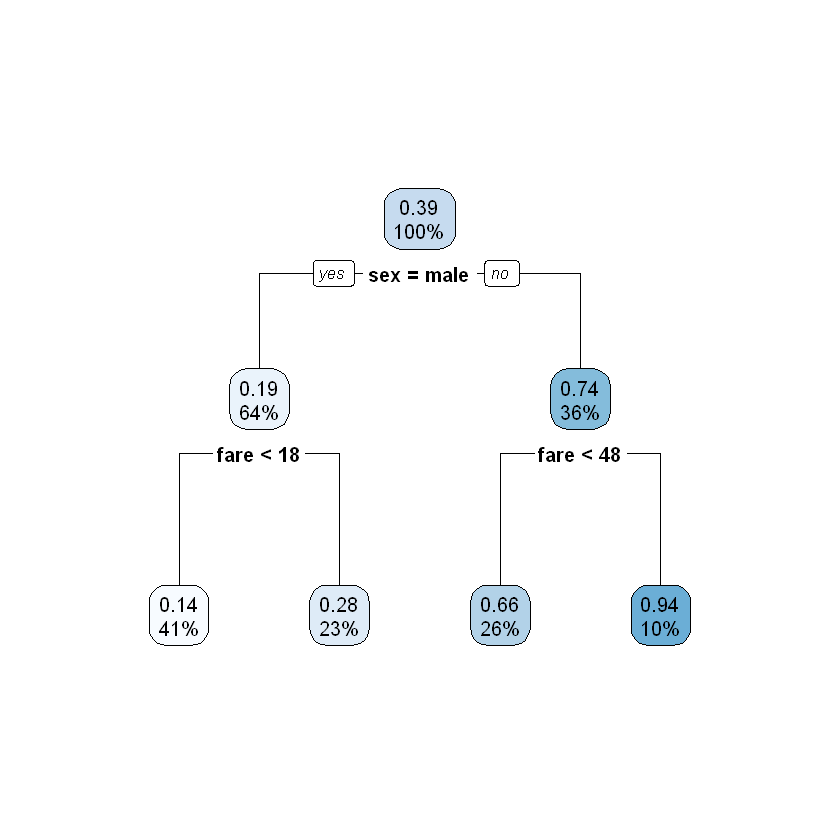

In [22]:
sample_data  <-  sample.split(titanic_data, SplitRatio = 0.75)
train_data <- subset(titanic_data, sample_data == TRUE)
test_data <- subset(titanic_data, sample_data == FALSE)

rtree <- rpart(survived ~ .,train_data)
rpart.plot(rtree)

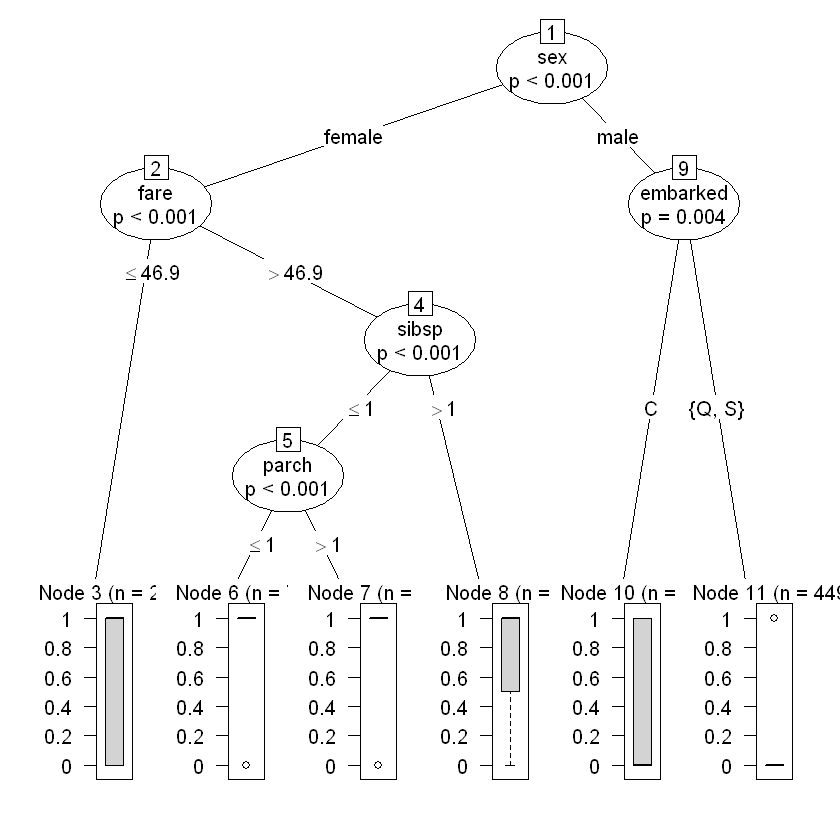

In [23]:
ctree_ <- ctree(survived ~ ., train_data)
plot(ctree_)